# Imbalanced Learn

Yan Vianna Sym

Instituto de Computação - Unicamp
2018

In [47]:
# imports
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from __future__ import print_function

np.random.seed(999)
%matplotlib inline

In [48]:
# O codigo abaixo ira baixar e carregar o conjunto `spambase`.
# Leia sobre este conjunto aqui: https://archive.ics.uci.edu/ml/datasets/spambase

target_names = ['not-spam', 'spam']
label_field = 'label'
attributes = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
              'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
              'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
              'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
              'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
              'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
              'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
              'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
              'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
              'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
              'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
              'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
              'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
              'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
              'capital_run_length_total', label_field]
features = [a for a in attributes if a != 'label']

d = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',
                header=None, names=attributes, delimiter=',')

In [49]:
d.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Conjunto Spambase de treino:
amostras: 2226
características: 57
frequência das classes: {'not-spam': 2091, 'spam': 135}
Conjunto Spambase de teste:
amostras: 1151
características: 57
frequência das classes: {'not-spam': 697, 'spam': 454}


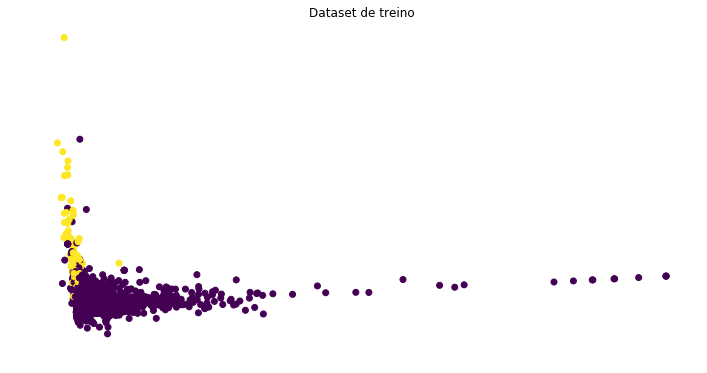

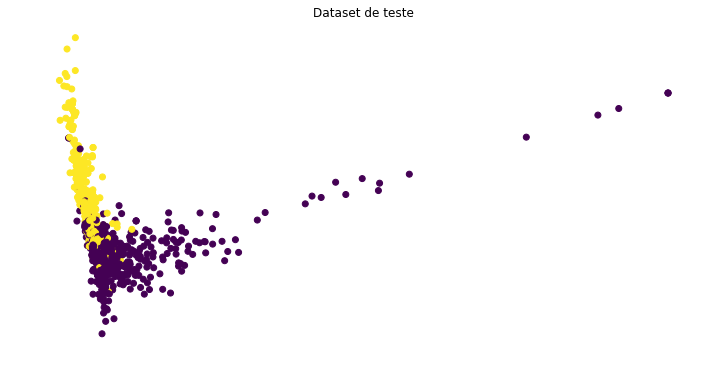

In [50]:
def describe(x, y, classes):
    """Descreve um conjunto de dados.
    
    :param x: np.ndarray, as amostras no conjunto.
    :param y: np.ndarray, os rotulos associados as amostras `x`.
    :param classes: list, uma lista com os nomes de cada classe. 
    """
    print('amostras:', x.shape[0])
    print('características:', x.shape[1])

    _, counts = np.unique(y, return_counts=True)
    print('frequência das classes:', dict(zip(classes, counts)))

def show_datasets(x, y, title):
    """Encontra um "embedding" de um conjunto que alinha as direções
       de maximiza separação das amostras com os eixos da base canônica.
    
    :param x: np.ndarray, as amostras do conjunto.
    :param y: np.ndarray, os rotulos associados as amostras `x`.
    :param title: str, o titulo do conjunto a ser exibido.
    """
    e = make_pipeline(
        StandardScaler(),
        PCA(n_components=2)
    ).fit_transform(x)

    _ = plt.figure(figsize=(12, 6))
    _ = plt.scatter(e[:, 0], e[:, 1], c=y)
    _ = plt.title(title)
    _ = plt.axis('off')

x_train, x_test, y_train, y_test = train_test_split(d[features], d['label'],
                                                    test_size=0.25,
                                                    random_state=1821)

# Seleciona 10% dos spams.
p, = np.where(y_train == 1)
np.random.shuffle(p)
p = p[:int(.1 * len(p))]
# Encontra os indices em treino que pertencem aos 10% selecionados.
p = np.in1d(np.arange(len(y_train)), p)
# Seleciona todos os nao-spam ou os 10% spams selecionados.
p = (y_train == 0) | p
# Filtra o conjunto de treino, mantendo somente os selecionados.
x_train, y_train = x_train[p], y_train[p]

print('Conjunto Spambase de treino:')
describe(x_train, y_train, target_names)
print('Conjunto Spambase de teste:')
describe(x_test, y_test, target_names)
show_datasets(x_train, y_train, 'Dataset de treino')
show_datasets(x_test, y_test, 'Dataset de teste')

In [51]:
# Treinando o modelo

# alguns parametros para o grid search usando validação cruzada (cross vaidation com kfold=10)
parameters = [{'pca__n_components': [0.99], 'clf__kernel': ['rbf'], 'clf__gamma': [1e-3, 1e-4], 'clf__C': [1e-2, 1e-1, 1, 10, 100]}]

# objeto pipeline
clf_pipeline = Pipeline([('standardscaler', StandardScaler()), ('pca', PCA()), ('clf', SVC())])

# numero de folds (metodo kfold)
folds = 10

# search best parameters...
clf = GridSearchCV(clf_pipeline, param_grid = parameters, cv=folds, scoring='accuracy')
clf.fit(x_train, y_train)

print("Melhores parametros:")
print(clf.best_params_)

print("Resultados do grid search:\n---------------")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%f +- %f - %r" % (mean, std * 2, params))    


# Avalie seu treinamento sobre o conjunto de teste...

y_pred = clf.predict(x_test)
score = accuracy_score(y_test, y_pred)
print ('---------------\nAccuracia no conjunto de teste:', score)
print(classification_report(y_test, y_pred))

Melhores parametros:
{'clf__C': 100, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
Resultados do grid search:
---------------
0.939353 +- 0.004168 - {'clf__C': 0.01, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.939353 +- 0.004168 - {'clf__C': 0.01, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.939353 +- 0.004168 - {'clf__C': 0.1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.939353 +- 0.004168 - {'clf__C': 0.1, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.955975 +- 0.016028 - {'clf__C': 1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.939353 +- 0.004168 - {'clf__C': 1, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.964960 +- 0.015015 - {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.953729 +- 0.012138 - {'clf__C': 10, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca_

**Comparação dos resultados obtidos após utilizar SMOTE (Imbalanced-learn)**

**Referência: https://jair.org/index.php/jair/article/view/10302 **

Conjunto Spambase apos balanceamento:
amostras: 4182
características: 57
frequência das classes: {'not-spam': 2091, 'spam': 2091}
Melhores parametros:
{'clf__C': 100, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
Resultados do grid search:
---------------
0.835485 +- 0.041156 - {'clf__C': 0.01, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.542802 +- 0.017907 - {'clf__C': 0.01, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.937829 +- 0.025482 - {'clf__C': 0.1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.613582 +- 0.041182 - {'clf__C': 0.1, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.953372 +- 0.019278 - {'clf__C': 1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.929699 +- 0.027227 - {'clf__C': 1, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'pca__n_components': 0.99}
0.965088 +- 0.016848 - {'clf__C': 10, 'clf__gamma': 0.001, 'clf__

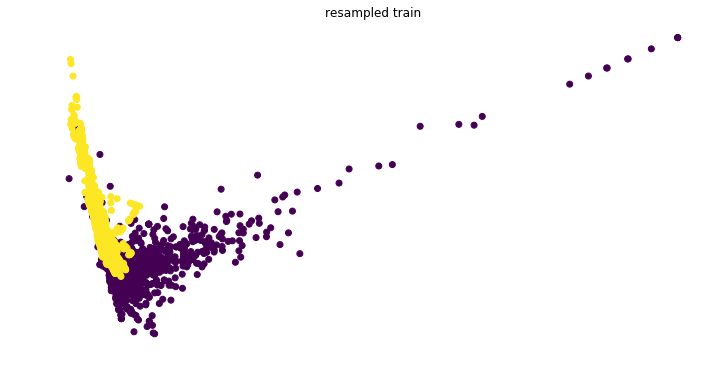

In [52]:
balancer = SMOTE()
x_resampled_train, y_resampled_train = balancer.fit_sample(x_train, y_train)

print('Conjunto Spambase apos balanceamento:')
describe(x_resampled_train, y_resampled_train, target_names)
show_datasets(x_resampled_train, y_resampled_train, 'resampled train')

# Treine o modelo sobre o conjunto de treino...

# search best parameters...
clf = GridSearchCV(clf_pipeline, param_grid = parameters, cv=folds, scoring='accuracy')
clf.fit(x_resampled_train, y_resampled_train)
    
print("Melhores parametros:")
print(clf.best_params_)

print("Resultados do grid search:\n---------------")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%f +- %f - %r" % (mean, std * 2, params))    

# resultado: mehor acurácia de 0.705 para os parametros:
    

# Avalie seu treinamento sobre o conjunto de teste...

y_pred = clf.predict(x_test)
score = accuracy_score(y_test, y_pred)
print ('---------------\nAccuracia no conjunto de teste:', score)
print(classification_report(y_test, y_pred))

** Acurácia sem SMOTE: 84.5% **

** Acurácia com SMOTE: 89.5% **